In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import os
import dask.dataframe as dd
from random import randint
import numpy as np
from dask.array import from_array as fa

from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import math

cluster = SLURMCluster() #add arguments if want a cluster outside of the set up defult
cluster = SLURMCluster(cores=24, processes=6, walltime="3:00:00", queue="compute", memory= "120GB")

/home/dougfe/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39954 instead
  warnings.warn(
/home/dougfe/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38024 instead
  warnings.warn(


In [2]:

cluster.scale(jobs=2)

In [3]:
client = Client(cluster)
client


Client Scheduler: tcp://10.22.255.206:33684 Dashboard: http://10.22.255.206:38024/status,Cluster Workers: 12 Cores: 48 Memory: 240.00 GB


In [4]:
sourceFile = 'shortData.csv'
df = dd.read_csv(sourceFile, dtype = 'object', low_memory=False, error_bad_lines=False)
#df = dd.read_parquet(sourceFile)  # For if you're smart and use parquet files instead of csvs

In [6]:

pd.set_option('display.max.columns', None)
pd.set_option('display.width', 150)
print(df.shape,'\n\n')
print(df.head(),'\n\n')
df.describe()


(Delayed('int-34bc9d4e-83ab-4f7a-8be9-2a201acea51e'), 76) 


  Unnamed: 0  JobIDRaw   step           JobID  UID  GID AssocID Cluster                 JobName User Group Account Reservation ReservationId  \
0          0  35767092  batch  35767092.batch  NaN  NaN   24786   comet                   batch  NaN   NaN  mit178         NaN           NaN   
1          1  35767116  batch  35767116.batch  NaN  NaN   24786   comet                   batch  NaN   NaN  mit178         NaN           NaN   
2          2  35790946      0      35790946.0  NaN  NaN    1263   comet  _batch_command.cmdline  NaN   NaN  sds121         NaN           NaN   
3          3  35790948      0      35790948.0  NaN  NaN    1263   comet  _batch_command.cmdline  NaN   NaN  sds121         NaN           NaN   
4          4  35790951      0      35790951.0  NaN  NaN    1263   comet  _batch_command.cmdline  NaN   NaN  sds121         NaN           NaN   

  Partition  QOS QOSRAW NNODES NTASKS NCPUS AllocCPUS ReqCPUS ReqCPUFreq  

,Unnamed: 0,JobIDRaw,step,JobID,UID,GID,AssocID,Cluster,JobName,User,Group,Account,Reservation,ReservationId,Partition,QOS,QOSRAW,NNODES,NTASKS,NCPUS,AllocCPUS,ReqCPUS,ReqCPUFreq,ReqMem,ReqGRES,AllocGRES,Timelimit,Priority,State,ExitCode,DerivedExitCode,Submit,Eligible,Start,End,Time,Elapsed,Reserved,Suspended,AveCPU,MinCPU,MinCPUNode,MinCPUTask,ResvCPU,ResvCPURaw,TotalCPU,SystemCPU,UserCPU,CPUTime,CPUTimeRaw,AveCPUFreq,AveDiskRead,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,AveDiskWrite,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,AvePages,MaxPages,MaxPagesNode,MaxPagesTask,AveRss,MaxRSS,MaxRSSNode,MaxRSSTask,AveVMSize,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,ConsumedEnergy,ConsumedEnergyRaw,Layout,Comment,NodeList
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [7]:
queryDF = df
queryDF.head(50)

,Unnamed: 0,JobIDRaw,step,JobID,UID,GID,AssocID,Cluster,JobName,User,Group,Account,Reservation,ReservationId,Partition,QOS,QOSRAW,NNODES,NTASKS,NCPUS,AllocCPUS,ReqCPUS,ReqCPUFreq,ReqMem,ReqGRES,AllocGRES,Timelimit,Priority,State,ExitCode,DerivedExitCode,Submit,Eligible,Start,End,Time,Elapsed,Reserved,Suspended,AveCPU,MinCPU,MinCPUNode,MinCPUTask,ResvCPU,ResvCPURaw,TotalCPU,SystemCPU,UserCPU,CPUTime,CPUTimeRaw,AveCPUFreq,AveDiskRead,MaxDiskRead,MaxDiskReadNode,MaxDiskReadTask,AveDiskWrite,MaxDiskWrite,MaxDiskWriteNode,MaxDiskWriteTask,AvePages,MaxPages,MaxPagesNode,MaxPagesTask,AveRss,MaxRSS,MaxRSSNode,MaxRSSTask,AveVMSize,MaxVMSize,MaxVMSizeNode,MaxVMSizeTask,ConsumedEnergy,ConsumedEnergyRaw,Layout,Comment,NodeList
0,0,35767092,batch,35767092.batch,NaN,NaN,24786,comet,batch,NaN,NaN,mit178,NaN,NaN,NaN,NaN,NaN,1,1,24,24,24,0,6000Mc,NaN,NaN,NaN,NaN,CANCELLED,0:15,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,11-02:35:27,11-02:35:27,comet-25-17,0.0,INVALID,NaN,11-02:35:27,02:36:30,10-23:58:57,00:00:24,24,4.26M,1877499M,1877499M,comet-25-17,0.0,245609M,245609M,comet-25-17,0.0,237K,237K,comet-25-17,0.0,9748300K,10049932K,comet-25-17,0.0,17100848K,19919716K,comet-25-17,0.0,0.0,0.0,Unknown,NaN,comet-25-17
1,1,35767116,batch,35767116.batch,NaN,NaN,24786,comet,batch,NaN,NaN,mit178,NaN,NaN,NaN,NaN,NaN,1,1,24,24,24,0,5000Mc,NaN,NaN,NaN,NaN,CANCELLED,0:15,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,14-12:51:34,14-12:51:34,comet-15-57,0.0,INVALID,NaN,14-12:51:34,03:31:01,14-09:20:33,00:00:24,24,3.15M,2711840M,2711840M,comet-15-57,0.0,328764M,328764M,comet-15-57,0.0,243K,243K,comet-15-57,0.0,9842108K,10940836K,comet-15-57,0.0,18116892K,22811936K,comet-15-57,0.0,0.0,0.0,Unknown,NaN,comet-15-57
2,2,35790946,0,35790946.0,NaN,NaN,1263,comet,_batch_command.cmdline,NaN,NaN,sds121,NaN,NaN,NaN,NaN,NaN,1,8,8,8,8,Unknown,0n,NaN,NaN,NaN,NaN,RUNNING,0:0,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,NaN,NaN,NaN,NaN,INVALID,NaN,00:00:00,NaN,NaN,00:00:08,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block,NaN,comet-02-01
3,3,35790948,0,35790948.0,NaN,NaN,1263,comet,_batch_command.cmdline,NaN,NaN,sds121,NaN,NaN,NaN,NaN,NaN,2,12,12,12,12,Unknown,0n,NaN,NaN,NaN,NaN,RUNNING,0:0,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,NaN,NaN,NaN,NaN,INVALID,NaN,00:00:00,NaN,NaN,00:00:12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block,NaN,"comet-05-[65,70]"
4,4,35790951,0,35790951.0,NaN,NaN,1263,comet,_batch_command.cmdline,NaN,NaN,sds121,NaN,NaN,NaN,NaN,NaN,1,6,6,6,6,Unknown,0n,NaN,NaN,NaN,NaN,RUNNING,0:0,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,NaN,NaN,NaN,NaN,INVALID,NaN,00:00:00,NaN,NaN,00:00:06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block,NaN,comet-04-64
5,5,35790952,0,35790952.0,NaN,NaN,1263,comet,_batch_command.cmdline,NaN,NaN,sds121,NaN,NaN,NaN,NaN,NaN,2,12,12,12,12,Unknown,0n,NaN,NaN,NaN,NaN,RUNNING,0:0,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,NaN,NaN,NaN,NaN,INVALID,NaN,00:00:00,NaN,NaN,00:00:12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Block,NaN,"comet-23-[10,51]"
6,6,35790955,0,35790955.0,NaN,NaN,1263,comet,_batch_command.cmdline,NaN,NaN,sds121,NaN,NaN,NaN,NaN,NaN,1,6,6,6,6,Unknown,0n,NaN,NaN,NaN,NaN,RUNNING,0:0,NaN,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:00,2020-09-29T00:00:01,NaN,00:00:01,INVALID,00:00:00,NaN,NaN,NaN,NaN,INVALID,NaN,00:00:00,NaN,NaN,00:00:06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:

for orig in queryDF['MaxRSS']:
    if (type(orig) != int) and (type(orig) != float):
        if (orig[-1] == "K"):
            num = float(orig[0 : -1])
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig[-1] == "M"):
            num = float(orig[0 : -1]) * 1024
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig[-1] == "G"):
            num = float(orig[0 : -1]) * 1024 * 1024
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, num)
        elif (orig == ""):
            queryDF["MaxRSS"] = queryDF["MaxRSS"].replace(orig, 0.0)
    
      

In [9]:
for ori, core in zip(queryDF['ReqMem'], queryDF["NCPUS"]):
    if (type(ori) != int) and (type(ori) != float):
        if (ori[-1] == "n"):
            if (ori[-2] == "K"):
                nums = float(ori[:-2])
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)
            elif (ori[-2] == "M"):
                nums = float(ori[:-2]) * 1024
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)
            elif (ori[-2] == "G"):
                nums = float(ori[:-2]) * 1024 * 1024
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)
        elif (ori == ""):
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, 0.0)
        elif (ori[-1] == "c"):
            if (ori[-2] == "K"):
                nums = float(ori[:-2]) * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)
            elif (ori[-2] == "M"):
                nums = float(ori[:-2]) * 1024 * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)
            elif (ori[-2] == "G"):
                nums = float(ori[:-2]) * 1024 * 1024 * float(core)
                queryDF["ReqMem"] = queryDF["ReqMem"].replace(ori, nums)



In [10]:
pd.set_option("display.max.rows", 100)
queryDF['MaxRSS']=queryDF['MaxRSS'].astype(float)
queryDF['ReqMem']=queryDF['ReqMem'].astype(float)
queryDF.dtypes

Unnamed: 0            object
JobIDRaw              object
step                  object
JobID                 object
UID                   object
GID                   object
AssocID               object
Cluster               object
JobName               object
User                  object
Group                 object
Account               object
Reservation           object
ReservationId         object
Partition             object
QOS                   object
QOSRAW                object
NNODES                object
NTASKS                object
NCPUS                 object
AllocCPUS             object
ReqCPUS               object
ReqCPUFreq            object
ReqMem               float64
ReqGRES               object
AllocGRES             object
Timelimit             object
Priority              object
State                 object
ExitCode              object
DerivedExitCode       object
Submit                object
Eligible              object
Start                 object
End           

In [11]:
# This just cleans and speeds up plotting process
queryDF = queryDF.loc[queryDF['MaxRSS'] < 200000000]
queryDF = queryDF.loc[queryDF['MaxRSS'] > 0]
queryDF = queryDF.loc[queryDF['ReqMem'] < 200000000]
queryDF = queryDF.loc[queryDF['ReqMem'] > 0]


In [18]:
# Run mem query to see number of jobs in dataset greater than input var
memQVal = 5000000
len(queryDF.query('MaxRSS > ' + str(memQVal)))

688

In [ ]:
queryDF = queryDF.compute()
#queryDF.head()

In [ ]:
# Produce bin limits list for plotting

binLims = [0]
limInt = 10000000
while limInt <= 200000000:
    binLims.append(limInt)
    limInt+=10000000
    
print(binLims)

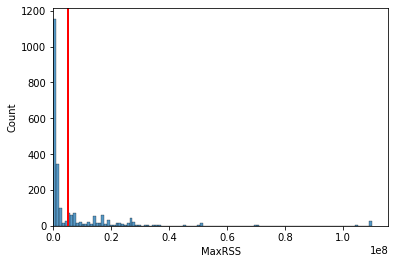

In [12]:
# Normally graphing mem data
plot1 = sns.histplot(data=queryDF, x = 'MaxRSS')
plt.xlim(0)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.show()


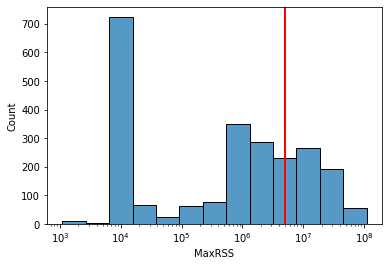

In [13]:
# Graphing histplot with log x axis and scaling bin sizes
mainPlot = sns.histplot(data=queryDF, x="MaxRSS", log_scale = True)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.show()

<AxesSubplot:xlabel='MaxRSS', ylabel='Count'>

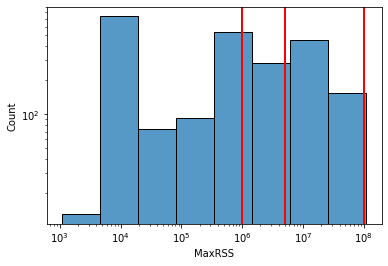

In [16]:
splot = sns.histplot(data=queryDF, x="MaxRSS", bins=8,log_scale = True)
splot.set(yscale="log")
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=1000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
splot

<AxesSubplot:xlabel='MaxRSS', ylabel='Count'>

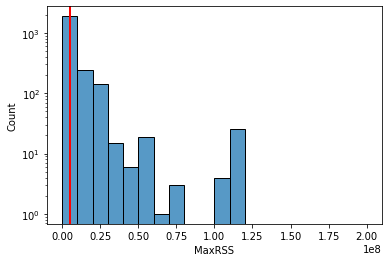

In [31]:
splot = sns.histplot(data=queryDF, x="MaxRSS",bins=binLims, log_scale = False)
splot.set(yscale="log")
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
splot

In [92]:
# histogram zoom function. 
import math
def logYhistplot(xMin, xMax):
    plt.xlim(xMin, xMax)
    binNum = max(int(math.ceil(50*(120000000/(xMax-xMin)))),50)
    mplot = sns.histplot(data=queryDF, x="MaxRSS", bins = binNum, log_scale = False)
    mplot.set(yscale="log")
    plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
    plt.axvline(x=10000000, ymin=0,ymax=1,linewidth=2, color='r')
    plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
    
    plt.title('MaxRSS from ' + str(xMin/1000000) + ' GB to ' + str(xMax/1000000) + ' GB')

    mplot


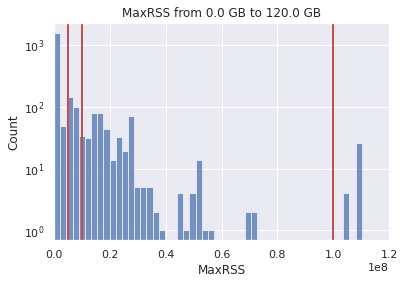

In [86]:
logYhistplot(0, 120000000)

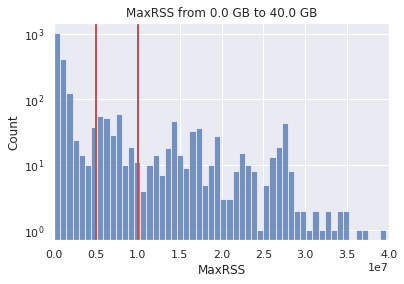

In [87]:
logYhistplot(0,40000000)

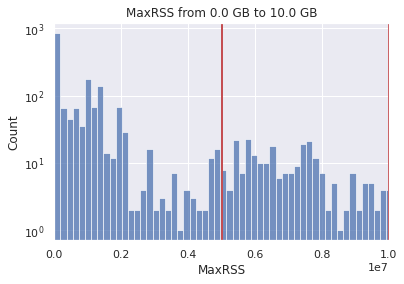

In [88]:
logYhistplot(0,10000000)

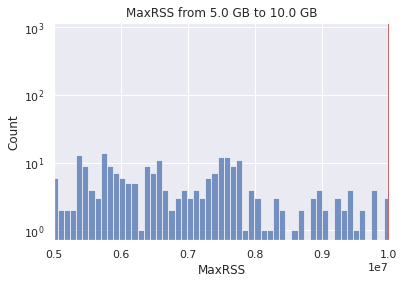

In [93]:
logYhistplot(5000000,10000000)

(array([1.246e+03, 3.290e+02, 2.900e+01, 1.900e+01, 6.400e+01, 8.100e+01,
        6.900e+01, 2.900e+01, 2.500e+01, 9.000e+00, 1.800e+01, 1.300e+01,
        3.700e+01, 4.200e+01, 1.300e+01, 6.600e+01, 8.000e+00, 3.500e+01,
        4.000e+00, 1.000e+01, 2.300e+01, 1.000e+01, 4.000e+00, 1.500e+01,
        4.900e+01, 2.200e+01, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.300e+01, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

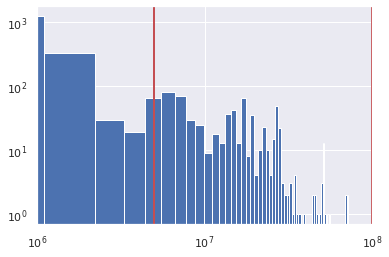

In [89]:
# Graphing node usage 
#plot1 = sns.histplot(data=queryDF, x="MaxRSS", bins = binNum, log_scale = False)
sns.set_theme()
plt.xscale('log')
plt.xlim(10**6,10**8)
plt.axvline(x=5000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=1000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.axvline(x=100000000, ymin=0,ymax=1,linewidth=2, color='r')
plt.hist(queryDF['MaxRSS'], log = True, bins = 100)

In [ ]:

queryDF.compute().describe()

In [19]:

# Query save system: If desired, users can save their current query as a parquet file for use later

saveName = 'sacctQuery'  # Doesn't need to include the .parqet or .csv extension
queryDF.to_parquet(saveName+'.parquet')